# Figure 1: Region Identification // Data Overview

In [1]:
import sys, os
import datetime
import numpy as np
sys.path.append(os.path.realpath(''))
import pandas as pd
import astropy.units as u
import matplotlib.pyplot as plt

import tools.utilities as utils


import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# REGIONS
loc_hcs = [61.5, 62.2]
loc_hcs1 = [357.7, 357.9]
ssw = [9, 19]
fsw = [42, 52]

# COLORS - 'azure'
cc = ['lightpink', 'mediumspringgreen', 'peachpuff', 'powderblue', 'thistle', 'palegoldenrod']
scol, hcol, fcol, rcol = ['lavender', 'azure', 'lavenderblush', 'grey']
cc = ['black', 'red', 'blue', 'green']
clight = ['lightgrey', '#E6A8C9', '#E6A8C9', '#A8E6BF']

# DIRECTORIES
RES_DIR = os.path.join('/Users/tamarervin/', 'e15_results')
FIG_DIR = os.path.realpath('figures')
PlotDir = '/Users/tamarervin/mplstyle/'



# PLOT STYLING
plot_style = os.path.join(PlotDir, 'figure_series.mplstyle')
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.cal'] = 'Helvetica Neue LT Pro'
plt.rcParams.update({'font.size': 20})
plt.style.use(plot_style)
plt.rcParams['axes.linewidth'] = 5


enc='E15'


## Read in Data

In [8]:
### READ IN DATA ###
parker, parkerdownt, parkerdownl, pss, orbiter, orbiterdownl, orbiterdownt, oss, wind, winddownt, winddownl, wss = utils.read_data(RES_DIR, sigma_time=20, pp='parker20_gamma.csv', pflag=True)

### DEFINE REGIONS ###
lon_footpoints = parker.sslon
hhcs = np.logical_and(lon_footpoints >= loc_hcs[0], lon_footpoints <=loc_hcs[1])
hhcs1 = np.logical_and(lon_footpoints >= loc_hcs1[0], lon_footpoints <=loc_hcs1[1])
slow = np.logical_and(lon_footpoints >=ssw[0], lon_footpoints <=ssw[1])
fast = np.logical_and(lon_footpoints >=fsw[0], lon_footpoints <=fsw[1])

/Users/tamarervin/publications/e15/tools/utilities.py:166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parker['flag'][sa] = np.zeros(len(parker['flag'][sa]))
/Users/tamarervin/publications/e15/tools/utilities.py:172: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  pss = parker.resample(sigma_bin, closed='left', label='left', loffset=sigma_bin / 2).mean()
/Users/tamarervin/publications/e15/tools/utilities.py:172: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numer

In [3]:
print('The sub-Alfvenic region is from', parker.Time[slow].iloc[0], parker.Time[slow].iloc[-1])
print('The sub-Alfvenic region is from', ((parker.rAU[slow].iloc[0])*u.AU).to(u.Rsun), ((parker.rAU[slow].iloc[-1])*u.AU).to(u.Rsun))

print('The fast wind stream is from', parker.Time[fast].iloc[0], parker.Time[fast].iloc[-1])
print('The HCS crossing  is from', parker.Time[hhcs].iloc[0], parker.Time[hhcs].iloc[-1])
print('The HCS crossing is from', parker.Time[hhcs1].iloc[0], parker.Time[hhcs1].iloc[-1])

The sub-Alfvenic region is from 2023-03-16 11:55:01.801250 2023-03-17 05:57:20.337802
The sub-Alfvenic region is from 21.91665176481804 solRad 15.597817747553572 solRad
The fast wind stream is from 2023-03-17 15:05:21.302677 2023-03-17 18:37:03.109332
The HCS crossing  is from 2023-03-17 20:07:19.028736 2023-03-17 21:59:46.645675
The HCS crossing is from 2023-03-16 03:00:28.497049 2023-03-16 07:29:58.350310


# Results Table

In [4]:
ff = parker
from plasmapy.formulary import beta, magnetic_pressure, thermal_pressure, ion_sound_speed
from astropy.constants import k_B
sound_speed = ion_sound_speed(
    T_e=np.array(ff.Te)*u.eV/k_B,
    T_i=np.array(ff.Tp)*u.eV/k_B,
    # n_e=np.array(ff.Ne)/(u.cm**3),
    # k=k_2,
    ion='p',
    gamma_e=1,
    gamma_i=3,
).to(u.km/u.s).value

In [11]:
dfslow = parker[slow].copy()
for col in dfslow.columns[2:]:
    print(col, np.nanmean(dfslow[col]))
print(np.nanmin(dfslow['MA']))
print(dfslow['sslon'].iloc[0], dfslow['sslon'].iloc[-1])

vt -11.124711105562321
vn -15.448582166034603
Np 340.04809205914586
Tp 38.615471138030344
angle_vb 2.0059172729699353
vra 205.2785717809497
vta -36.95106414900541
vna -18.142298224907265
Na 1.7621381397357405
Ta 199.06492326385197
Ne 404.8381179339424
Te 78.0091164799125
Teperp 52.43809942198046
Tepara 129.15115059577656
Br -408.0208443256533
Bt 34.33375162339601
Bn -4.683551199263977
B 413.01000228799273
vap 36.883467716533985
Ahe 0.005772314673837024
sigmac 0.797312162845658
sigmar -0.06795295399030422
vA 609.7146406976932
Zp 78.74133481986478
Zm 17.010979729428293
deltav 37.066860795271
deltab 43.047287647241376
diff 0.08771168838590845
MA 0.3202626509575297
MS 1.5311845947641594
MMS 0.31450508299903535
beta 0.02490813776082441
betae 0.09869366220066741
Pm 7.007713658885049e-08
Pp 1.819038513202931e-09
Pa 4.564710494319213e-11
Pe 6.686811970620666e-09
flag 0.0
lon 197.56822679691808
lat -0.1611663314442544
rAU 0.08788277177345533
sslon 14.610499038550833
sslat -0.1611663314442544
ss

In [10]:
dffast = parker[fast].copy()
for col in dffast.columns[1:]:
    print(col, np.nanmean(dffast[col]))
print(np.nanmin(dffast['MA']))
print(dffast['sslon'].iloc[0], dffast['sslon'].iloc[-1])

vr 424.8444145939883
vt -46.873808181922385
vn -21.763955659947136
Np 1357.3067069956633
Tp 109.40538374622403
angle_vb 1.9585672161851353
vra 601.6826771407207
vta -106.66935630551818
vna -15.350753315013609
Na 61.85243670240766
Ta 1156.099669560341
Ne 1339.4093067145207
Te 50.37584499574597
Teperp 47.505463300453435
Tepara 56.11660838633106
Br -692.6966230835951
Bt 66.57489280006013
Bn -10.502825690847983
B 739.5243044171406
vap 189.42398375084863
Ahe 0.046057786564088085
sigmac 0.8944041103046948
sigmar -0.20297894123171747
vA 447.167296786267
Zp 205.5658109988635
Zm 36.66051562159855
deltav 92.91866872536762
deltab 114.717778151297
diff 0.4291615875746216
MA 0.9636548775134459
MS 2.8199143357846643
MMS 0.9088759213652595
beta 0.11190013846614005
betae 0.04963703996160294
Pm 2.1768062154005312e-07
Pp 2.4188925931096982e-08
Pa 1.1679869748884466e-08
Pe 1.0790257441055841e-08
flag 0.0
lon 43.761755002177956
lat -3.240996002946607
rAU 0.06257697186073855
sslon 46.83656662882598
sslat -

In [19]:
parkerdownt.Time[0]

Timestamp('2023-03-15 00:15:00')

# Create Figure

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


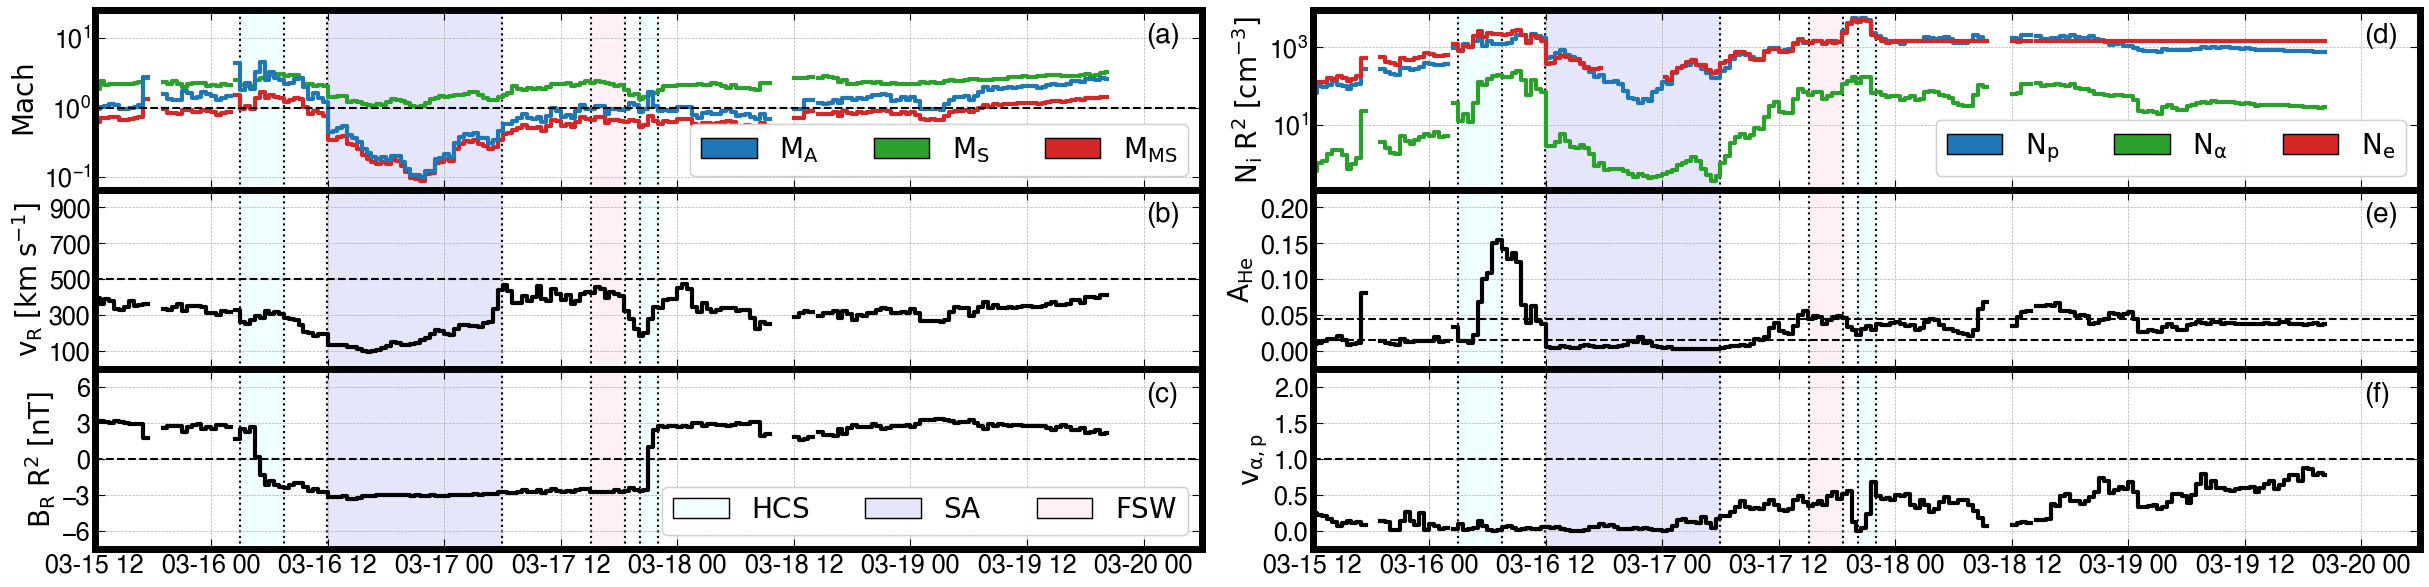

In [20]:


### DEFINE REGIONS ###
lon_footpoints = parker.sslon
hhcs = np.logical_and(lon_footpoints >= loc_hcs[0], lon_footpoints <=loc_hcs[1])
hhcs1 = np.logical_and(lon_footpoints >= loc_hcs1[0], lon_footpoints <=loc_hcs1[1])
slow = np.logical_and(lon_footpoints >=ssw[0], lon_footpoints <=ssw[1])
fast = np.logical_and(lon_footpoints >=fsw[0], lon_footpoints <=fsw[1])
# PLOT SETUP
# fig = plt.figure(figsize=(30, 7))
fig, grid = plt.subplots(3, 2, figsize=(30, 7), sharex='col', gridspec_kw={'wspace':0.10, 'hspace':0})

# LABELS
xlabel = r'$\rm Time$'
ylabels = [r'$\rm Mach$',
            r'$\rm v_R \; [km \; s^{-1}]$',
            r'$\rm B_R \; R^2 \;  [nT]$', 
            r'$\rm N_i \; R^2 \; [cm^{-3}]$',  
            r'$\rm A_{He}$',
            r'$\rm v_{\alpha, p}$'
            ]

rcol = 'grey'
cr, ct, cn, cmag = ['tab:blue', 'tab:green', 'tab:red', 'k']
lw = 3
ss = 1

# ---------- PANEL ONE: MACH NUMBER ----------
ax = grid[0, 0]
ax.step(parkerdownt.Time, parkerdownt.MS, where='mid', color=ct, linewidth=lw, label=r'$\rm M_S$', markersize=ss)
ax.step(parkerdownt.Time, parkerdownt.MMS, where='mid', color=cn, linewidth=lw, label=r'$\rm M_{MS}$', markersize=ss)
ax.step(parkerdownt.Time, parkerdownt.MA, where='mid', color=cr, linewidth=lw, label=r'$\rm M_A$', markersize=ss)
ax.axhline(1, color='k', linestyle='dashed')  # mach number
ax.set_yscale('log')

R_patch = mpatches.Patch(facecolor=cr, edgecolor='k', label=r'$\rm M_{A}$')
T_patch = mpatches.Patch(facecolor=ct, edgecolor='k', label=r'$\rm M_S$')
N_patch = mpatches.Patch(facecolor=cn, edgecolor='k', label=r'$\rm M_{MS}$')
leg0 = ax.legend(handles=[R_patch, T_patch, N_patch], loc='lower right', fontsize=20, ncol=3)
ax.add_artist(leg0)

# ---------- PANEL TWO: RADIAL VELOCITY ----------
ax = grid[1, 0]
ax.step(parkerdownt.Time, parkerdownt.vr, where='mid', color=cmag, linewidth=lw, label=r'$\rm v_R \; [km \; s^{-1}]$', markersize=ss)
ax.axhline(500, color='k', linestyle='dashed')  # radial velocity
ax.set(ylim=(0, 1000), yticks=np.arange(100, 901, step=200))

# ---------- PANEL FIVE: SCALED RADIAL FIELD ----------
ax = grid[2, 0]
ax.step(parkerdownt.Time, parkerdownt.BrR2, where='mid', color=cmag, linewidth=lw, label=r'$\rm B_R \; R^2 \;  [nT]$', markersize=ss)
ax.axhline(0, color='k', linestyle='dashed')  # magnetic field
ax.set(ylim=(-7.5, 7.5), yticks=np.arange(-6, 6.1, step=3))

R_patch = mpatches.Patch(facecolor=hcol, edgecolor='k', label=r'$\rm HCS$')
T_patch = mpatches.Patch(facecolor=scol, edgecolor='k', label=r'$\rm SA$')
N_patch = mpatches.Patch(facecolor=fcol, edgecolor='k', label=r'$\rm FSW$')
leg0 = ax.legend(handles=[R_patch, T_patch, N_patch], loc='lower right', fontsize=20, ncol=3)
ax.add_artist(leg0)

# ---------- PANEL THREE: DENSITY ----------
ax = grid[0, 1]
ax.step(parkerdownt.Time, parkerdownt.Np, where='mid', color=cr, linewidth=lw, label=r'$\rm N_{p}$', markersize=ss)
ax.step(parkerdownt.Time, parkerdownt.Na, where='mid', color=ct, linewidth=lw, label=r'$\rm N_{\alpha}$', markersize=ss)

# electron density -- fix for bad observation
flagNe = np.logical_and(pd.Timestamp('2023-03-15 00:00:00')<=parkerdownt.Time, parkerdownt.Time<=pd.Timestamp('2023-03-16 18:00:00'))
ax.step(parkerdownt.Time[flagNe], parkerdownt.Ne[flagNe], where='mid', color=cn, linewidth=lw, label=r'$\rm N_{E}$', markersize=ss)
flagNe = np.logical_and(pd.Timestamp('2023-03-17 00:00:00')<=parkerdownt.Time, parkerdownt.Time<=pd.Timestamp('2023-03-20 00:00:00'))
ax.step(parkerdownt.Time[flagNe], parkerdownt.Ne[flagNe], where='mid', color=cn, linewidth=lw, label=r'$\rm N_{E}$', markersize=ss)

ax.set_yscale('log')

R_patch = mpatches.Patch(facecolor=cr, edgecolor='k', label=r'$\rm N_{p}$')
T_patch = mpatches.Patch(facecolor=ct, edgecolor='k', label=r'$\rm N_{\alpha}$')
N_patch = mpatches.Patch(facecolor=cn, edgecolor='k', label=r'$\rm N_{e}$')
leg0 = ax.legend(handles=[R_patch, T_patch, N_patch], loc='lower right', fontsize=20, ncol=3)
ax.add_artist(leg0)

# ---------- PANEL FOUR: HELIUM ABUNDANCE ----------
ax = grid[1, 1]
ax.step(parkerdownt.Time, parkerdownt.Ahe, where='mid', color=cmag, linewidth=lw, label=r'$\rm A_{He}$', markersize=ss)
ax.axhline(0.045, color='k', linestyle='dashed')  # high helium abundance
ax.axhline(0.015, color='k', linestyle='dashed')  # low helium abundance
ax.set(ylim=(-0.025, 0.225), yticks=np.arange(0, 0.21, step=0.05))

# ---------- PANEL SIX: VELOCITY DIFFERENTIAL ----------
ax = grid[2, 1]
ax.step(parkerdownt.Time, np.abs(parkerdownt.vap)/parkerdownt.vA, where='mid', color=cmag, linewidth=lw, label=r'$\rm v_{\alpha, p}$', markersize=ss)
ax.axhline(1, color='k', linestyle='dashed')  # velocity differential
ax.set(ylim=(-0.25, 2.25), yticks=np.arange(0, 2.1, step=0.5))

# FULL DATA
panel_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
for i, ax in enumerate([grid[0, 0], grid[1, 0], grid[2, 0], grid[0, 1], grid[1, 1], grid[2, 1]]):
    ### ADD Y-LABEL
    ax.set_ylabel(ylabel=ylabels[i], fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=18) 
    
    ### ADD X-LIMITS
    ax.set_xlim(pd.Timestamp('2023-03-15 12:00:00'), pd.Timestamp('2023-03-20 06:00:00'))
    # ax.set_xticks([pd.Timestamp('2023-03-15 12:00:00'), pd.Timestamp('2023-03-16 00:00:00'), pd.Timestamp('2023-03-16 12:00:00'),
    #                pd.Timestamp('2023-03-17 00:00:00'), pd.Timestamp('2023-03-17 12:00:00'), pd.Timestamp('2023-03-18 00:00:00'),
    #                pd.Timestamp('2023-03-18 12:00:00'), pd.Timestamp('2023-03-19 00:00:00'), pd.Timestamp('2023-03-19 12:00:00'), 
    #                pd.Timestamp('2023-03-20 00:00:00')])

    ### ADD THE GRID
    ax.grid(True, linestyle='--', linewidth=0.5)

    ### ADD REGIONS
    regions = [
        (parker[hhcs].Time.iloc[0], parker[hhcs].Time.iloc[-1], hcol),
        (parker[hhcs1].Time.iloc[0], parker[hhcs1].Time.iloc[-1], hcol),
        (parker[slow].Time.iloc[0], parker[slow].Time.iloc[-1], scol),
        (parker[fast].Time.iloc[0], parker[fast].Time.iloc[-1], fcol)
    ]

    lines = [
        parker[hhcs].Time.iloc[0],
        parker[hhcs].Time.iloc[-1],
        parker[hhcs1].Time.iloc[0],
        parker[hhcs1].Time.iloc[-1],
        parker[slow].Time.iloc[0],
        parker[slow].Time.iloc[-1],
        parker[fast].Time.iloc[0],
        parker[fast].Time.iloc[-1]
    ]

    ### PLOT LINES AND REGIONS
    for line in lines:
        ax.axvline(line, color='k', linestyle='dotted', zorder=-2)

    for region in regions:
        ax.axvspan(region[0], region[1], color=region[2], zorder=-3)

    ### ADD PANEL LABELS
    ax.text(0.95, 0.93, panel_labels[i], transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')

##### ---------- LABEL REGIONS OF INTEREST ---------- ######
# ax = grid[0, 0]
# ax.text(0.14, 0.96, r'$\rm HCS$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
# ax.text(0.23, 0.96, r'$\rm Sub-Alfv\'enic$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
# ax.text(0.438, 0.96, r'$\rm FSW$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
# ax.text(0.485, 0.96, r'$\rm HCS$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')

# ##### ---------- LABEL REGIONS OF INTEREST ---------- ######
# ax = grid[0, 1]
# ax.text(0.14, 0.96, r'$\rm HCS$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
# ax.text(0.23, 0.96, r'$\rm Sub-Alfv\'enic$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
# ax.text(0.438, 0.96, r'$\rm FSW$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
# ax.text(0.485, 0.96, r'$\rm HCS$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')

### SAVE FIGURE ###
plt.savefig(os.path.realpath(os.path.join(FIG_DIR, 'fig1.png')), bbox_inches='tight')
plt.savefig(os.path.realpath(os.path.join('eps_figures', 'fig1.eps')), bbox_inches='tight')


    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Figure has been saved.


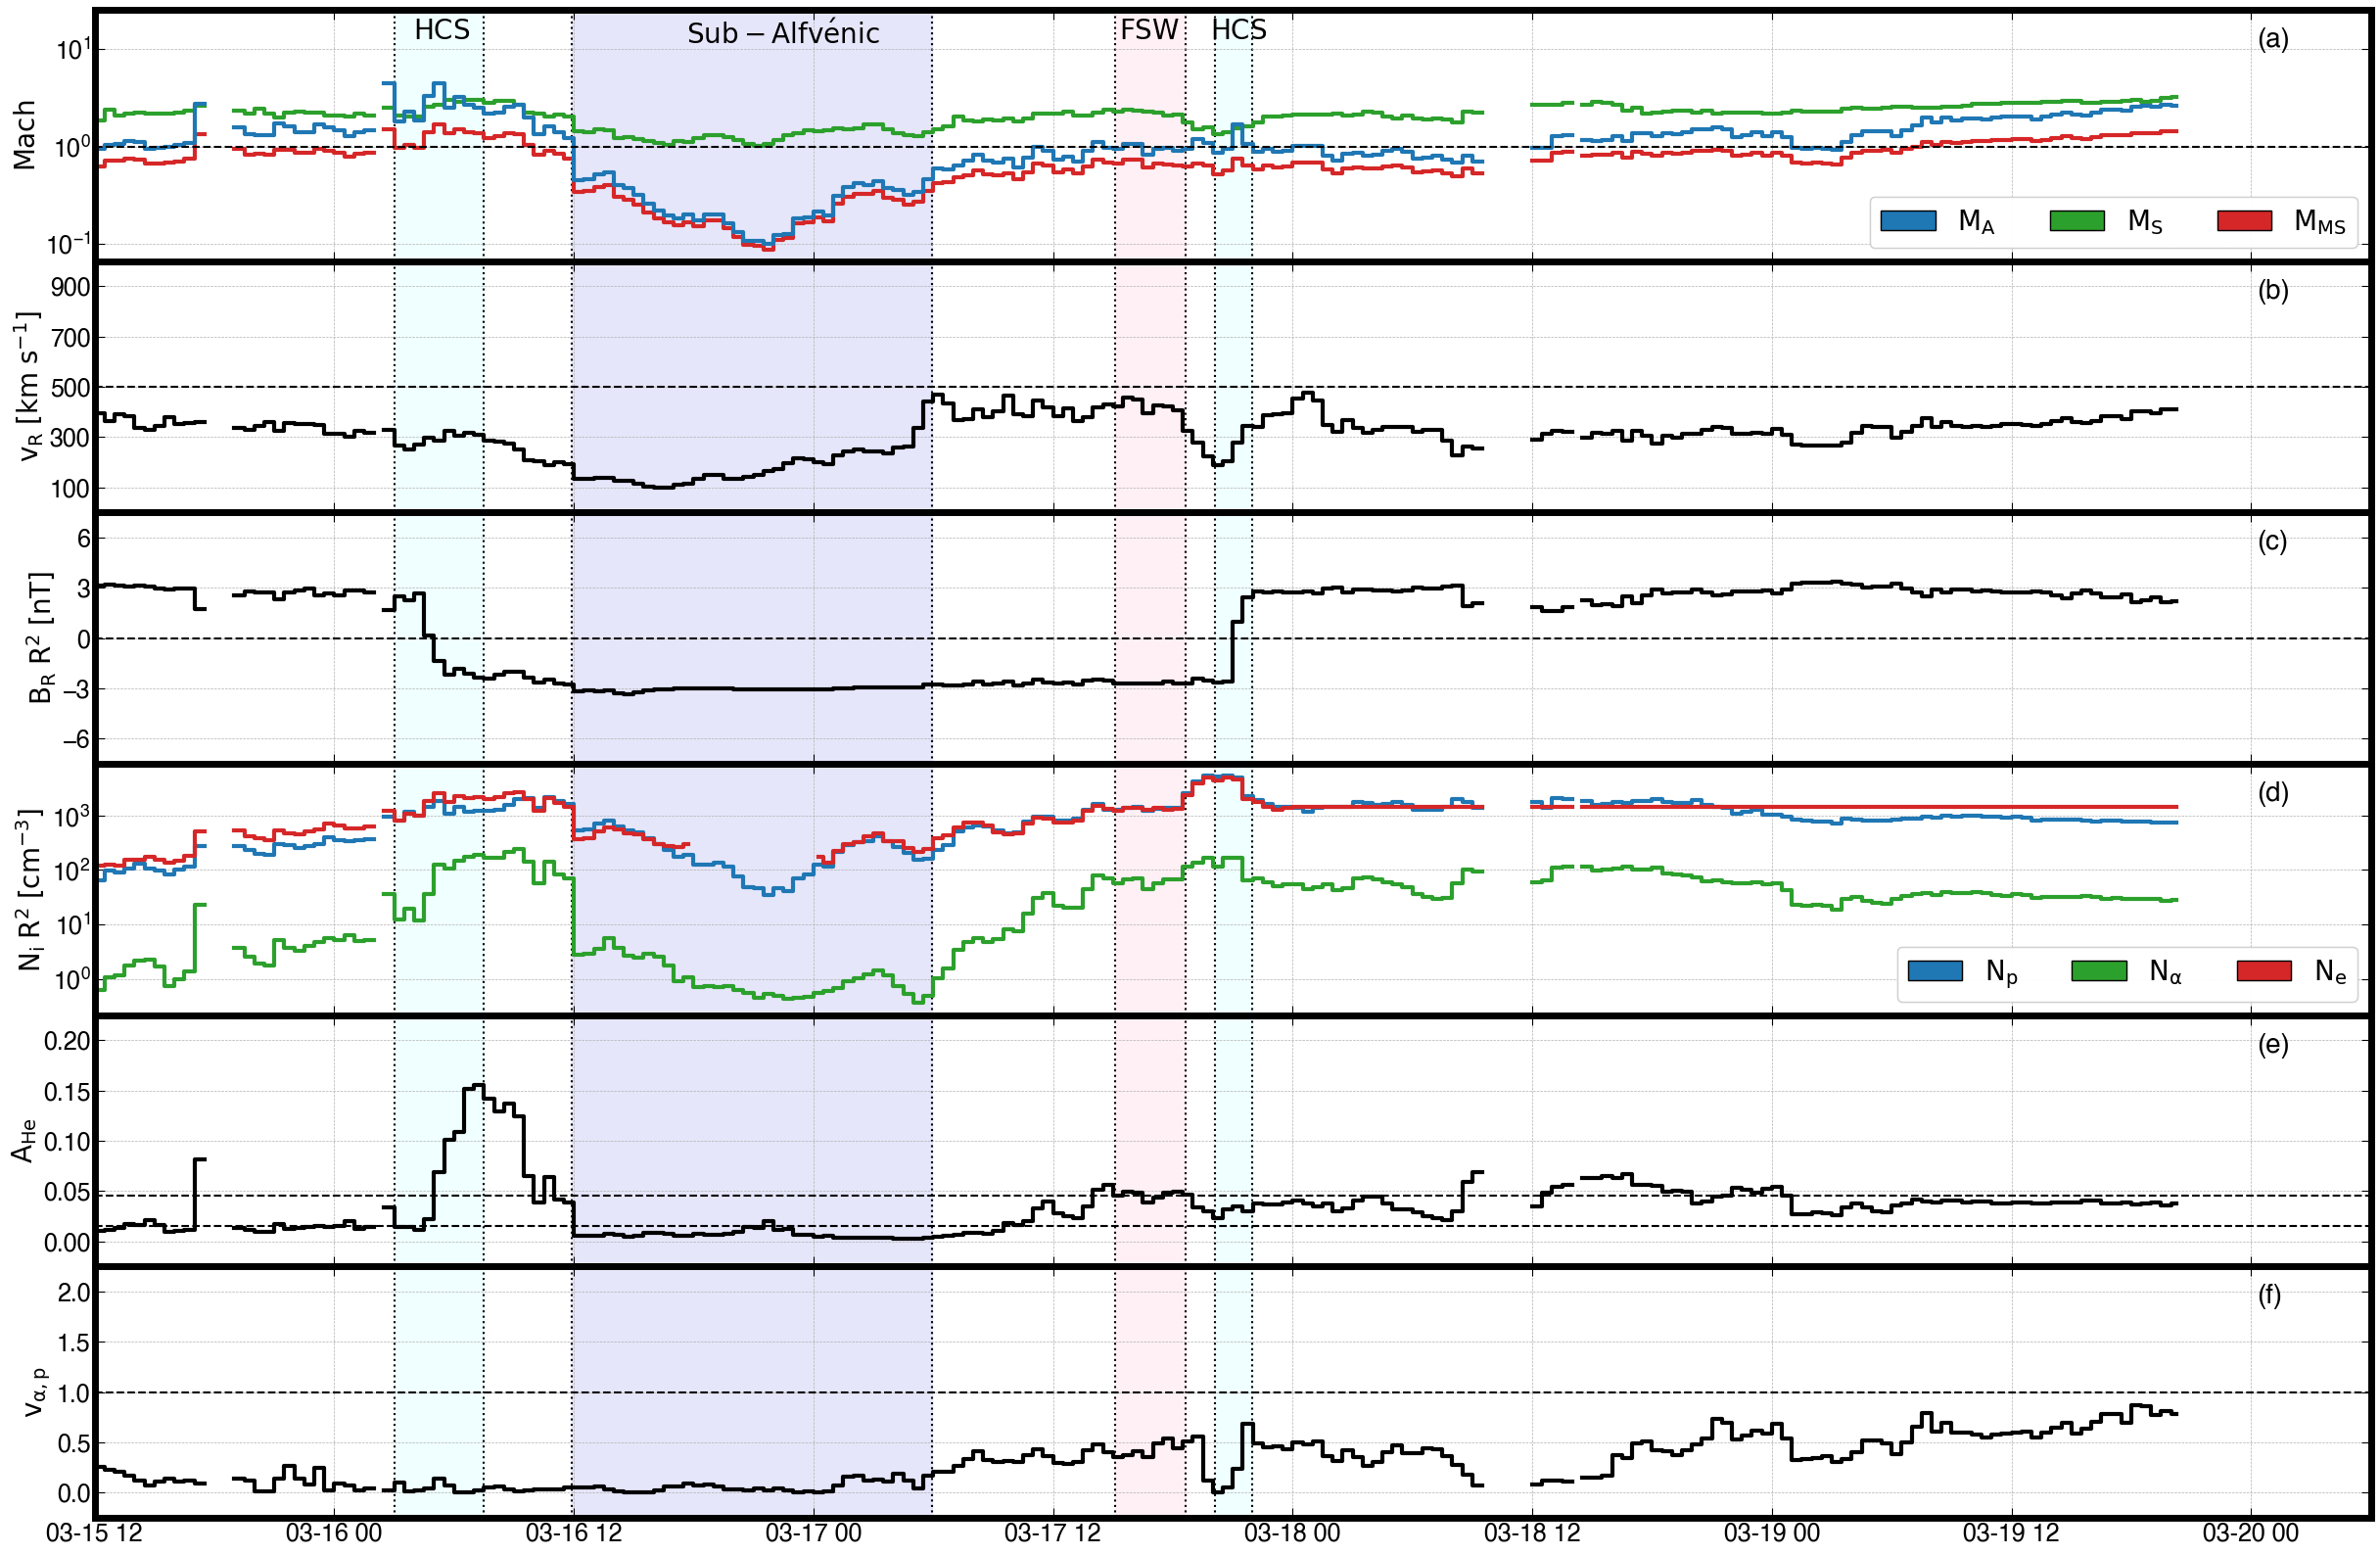

In [23]:
### DEFINE REGIONS ###
lon_footpoints = parker.sslon
hhcs = np.logical_and(lon_footpoints >= loc_hcs[0], lon_footpoints <=loc_hcs[1])
hhcs1 = np.logical_and(lon_footpoints >= loc_hcs1[0], lon_footpoints <=loc_hcs1[1])
slow = np.logical_and(lon_footpoints >=ssw[0], lon_footpoints <=ssw[1])
fast = np.logical_and(lon_footpoints >=fsw[0], lon_footpoints <=fsw[1])

# PLOT SETUP
fig, axs = plt.subplots(6, 1, figsize=(30, 20), sharex='col', gridspec_kw={'wspace':0.10, 'hspace':0})

# LABELS
xlabel = r'$\rm Time$'
ylabels = [r'$\rm Mach$',
            r'$\rm v_R \; [km \; s^{-1}]$',
            r'$\rm B_R \; R^2 \;  [nT]$', 
            r'$\rm N_i \; R^2 \; [cm^{-3}]$',  
            r'$\rm A_{He}$',
            r'$\rm v_{\alpha, p}$'
            ]

rcol = 'grey'
cr, ct, cn, cmag = ['tab:blue', 'tab:green', 'tab:red', 'k']
lw = 3
ss = 1

# ---------- PANEL ONE: MACH NUMBER ----------
ax = axs[0]
ax.step(parkerdownt.Time, parkerdownt.MS, where='mid', color=ct, linewidth=lw, label=r'$\rm M_S$', markersize=ss)
ax.step(parkerdownt.Time, parkerdownt.MMS, where='mid', color=cn, linewidth=lw, label=r'$\rm M_{MS}$', markersize=ss)
ax.step(parkerdownt.Time, parkerdownt.MA, where='mid', color=cr, linewidth=lw, label=r'$\rm M_A$', markersize=ss)
ax.axhline(1, color='k', linestyle='dashed')  # mach number
ax.set_yscale('log')

R_patch = mpatches.Patch(facecolor=cr, edgecolor='k', label=r'$\rm M_{A}$')
T_patch = mpatches.Patch(facecolor=ct, edgecolor='k', label=r'$\rm M_S$')
N_patch = mpatches.Patch(facecolor=cn, edgecolor='k', label=r'$\rm M_{MS}$')
leg0 = ax.legend(handles=[R_patch, T_patch, N_patch], loc='lower right', fontsize=20, ncol=3)
ax.add_artist(leg0)

# ---------- PANEL TWO: RADIAL VELOCITY ----------
ax = axs[1]
ax.step(parkerdownt.Time, parkerdownt.vr, where='mid', color=cmag, linewidth=lw, label=r'$\rm v_R \; [km \; s^{-1}]$', markersize=ss)
ax.axhline(500, color='k', linestyle='dashed')  # radial velocity
ax.set(ylim=(0, 1000), yticks=np.arange(100, 901, step=200))

# ---------- PANEL FIVE: SCALED RADIAL FIELD ----------
ax = axs[2]
ax.step(parkerdownt.Time, parkerdownt.BrR2, where='mid', color=cmag, linewidth=lw, label=r'$\rm B_R \; R^2 \;  [nT]$', markersize=ss)
ax.axhline(0, color='k', linestyle='dashed')  # magnetic field
ax.set(ylim=(-7.5, 7.5), yticks=np.arange(-6, 6.1, step=3))

# R_patch = mpatches.Patch(facecolor=hcol, edgecolor='k', label=r'$\rm HCS$')
# T_patch = mpatches.Patch(facecolor=scol, edgecolor='k', label=r'$\rm SA$')
# N_patch = mpatches.Patch(facecolor=fcol, edgecolor='k', label=r'$\rm FSW$')
# leg0 = ax.legend(handles=[R_patch, T_patch, N_patch], loc='lower right', fontsize=20, ncol=3)
# ax.add_artist(leg0)

# ---------- PANEL THREE: DENSITY ----------
ax = axs[3]
ax.step(parkerdownt.Time, parkerdownt.Np, where='mid', color=cr, linewidth=lw, label=r'$\rm N_{p}$', markersize=ss)
ax.step(parkerdownt.Time, parkerdownt.Na, where='mid', color=ct, linewidth=lw, label=r'$\rm N_{\alpha}$', markersize=ss)

# electron density -- fix for bad observation
flagNe = np.logical_and(pd.Timestamp('2023-03-15 00:00:00')<=parkerdownt.Time, parkerdownt.Time<=pd.Timestamp('2023-03-16 18:00:00'))
ax.step(parkerdownt.Time[flagNe], parkerdownt.Ne[flagNe], where='mid', color=cn, linewidth=lw, label=r'$\rm N_{E}$', markersize=ss)
flagNe = np.logical_and(pd.Timestamp('2023-03-17 00:00:00')<=parkerdownt.Time, parkerdownt.Time<=pd.Timestamp('2023-03-20 00:00:00'))
ax.step(parkerdownt.Time[flagNe], parkerdownt.Ne[flagNe], where='mid', color=cn, linewidth=lw, label=r'$\rm N_{E}$', markersize=ss)

ax.set_yscale('log')

R_patch = mpatches.Patch(facecolor=cr, edgecolor='k', label=r'$\rm N_{p}$')
T_patch = mpatches.Patch(facecolor=ct, edgecolor='k', label=r'$\rm N_{\alpha}$')
N_patch = mpatches.Patch(facecolor=cn, edgecolor='k', label=r'$\rm N_{e}$')
leg0 = ax.legend(handles=[R_patch, T_patch, N_patch], loc='lower right', fontsize=20, ncol=3)
ax.add_artist(leg0)

# ---------- PANEL FOUR: HELIUM ABUNDANCE ----------
ax = axs[4]
ax.step(parkerdownt.Time, parkerdownt.Ahe, where='mid', color=cmag, linewidth=lw, label=r'$\rm A_{He}$', markersize=ss)
ax.axhline(0.045, color='k', linestyle='dashed')  # high helium abundance
ax.axhline(0.015, color='k', linestyle='dashed')  # low helium abundance
ax.set(ylim=(-0.025, 0.225), yticks=np.arange(0, 0.21, step=0.05))

# ---------- PANEL SIX: VELOCITY DIFFERENTIAL ----------
ax = axs[5]
ax.step(parkerdownt.Time, np.abs(parkerdownt.vap)/parkerdownt.vA, where='mid', color=cmag, linewidth=lw, label=r'$\rm v_{\alpha, p}$', markersize=ss)
ax.axhline(1, color='k', linestyle='dashed')  # velocity differential
ax.set(ylim=(-0.25, 2.25), yticks=np.arange(0, 2.1, step=0.5))

# FULL DATA
panel_labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
for i, ax in enumerate(axs):
    ### ADD Y-LABEL
    ax.set_ylabel(ylabel=ylabels[i], fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=18) 
    
    ### ADD X-LIMITS
    ax.set_xlim(pd.Timestamp('2023-03-15 12:00:00'), pd.Timestamp('2023-03-20 06:00:00'))
    ### ADD THE GRID
    ax.grid(True, linestyle='--', linewidth=0.5)

    ### ADD REGIONS
    regions = [
        (parker[hhcs].Time.iloc[0], parker[hhcs].Time.iloc[-1], hcol),
        (parker[hhcs1].Time.iloc[0], parker[hhcs1].Time.iloc[-1], hcol),
        (parker[slow].Time.iloc[0], parker[slow].Time.iloc[-1], scol),
        (parker[fast].Time.iloc[0], parker[fast].Time.iloc[-1], fcol)
    ]

    lines = [
        parker[hhcs].Time.iloc[0],
        parker[hhcs].Time.iloc[-1],
        parker[hhcs1].Time.iloc[0],
        parker[hhcs1].Time.iloc[-1],
        parker[slow].Time.iloc[0],
        parker[slow].Time.iloc[-1],
        parker[fast].Time.iloc[0],
        parker[fast].Time.iloc[-1]
    ]

    ### PLOT LINES AND REGIONS
    for line in lines:
        ax.axvline(line, color='k', linestyle='dotted', zorder=-2)

    for region in regions:
        ax.axvspan(region[0], region[1], color=region[2], zorder=-3)

    ### ADD PANEL LABELS
    ax.text(0.95, 0.93, panel_labels[i], transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')

### LABEL REGIONS
ax = axs[0]
ax.text(0.14, 0.96, r'$\rm HCS$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.text(0.26, 0.96, r'$\rm Sub-Alfv\'enic$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.text(0.45, 0.96, r'$\rm FSW$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.text(0.49, 0.96, r'$\rm HCS$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')


### SAVE FIGURE ###
plt.savefig(os.path.realpath(os.path.join(FIG_DIR, 'fig1panel.png')), bbox_inches='tight')
plt.savefig(os.path.realpath(os.path.join('eps_figures', 'fig1panel.eps')), bbox_inches='tight')

print('Figure has been saved.')